1. Normalize everything
2. Select Features based on Correlation
3. Select channels based on Features
4. Do LDA at the end because that seems to work
5. Profit???

In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
with open('sensor_data.json') as file:
    data = json.load(file)

sensor_data = dict(data)

# Create an empty list to store the data
data_list = []

# Iterate over the sensor_data dictionary
for sensor, classes in sensor_data.items():
    for class_name, trials in classes.items():
        for trial in trials:
            # Append the trial data along with the sensor and class name
            data_list.append(trial + [sensor, class_name])

# Convert the list to a NumPy array
data_array = np.array(data_list)

features = [
    'degree_centrality',
    'betweenness_centrality',
    'closeness_centrality',
    'pagerank',
    'degree_distribution',
    'average_path_length',
    'assortativity',
    'longest_path',
    'no_of_edges',
    'clustering_coeff',
    'global_efficiency',
    'graph_index_complexity',
    'max_clique_size',
    'min_cut_size',
    'vertex_coloring_number',
    'entropy'
]

def get_sensor_data(sensor):
    sensor_name = sensor 
    sensor_mask = data_array[:, -2] == sensor_name
    selected_data = np.array(data_array[sensor_mask, :-2].astype(float))
    selected_class = np.array(data_array[sensor_mask, -1].astype(str))
    
    reshaped_class = selected_class.reshape(-1, 1)

    df = pd.DataFrame(np.concatenate(
        (selected_data, reshaped_class), axis=1), columns=features + ["Class"])
    df[df.columns[:-1]] = df[df.columns[:-1]].astype(float)
    
    return (df)

In [4]:
sensor_list = [
    "FP1", "FP2", "F7", "F8", "AF1", "AF2", "FZ", "F4", "F3", "FC6", "FC5", "FC2", "FC1", "T8", "T7", "CZ", "C3", "C4", "CP5", "CP6", "CP1", "CP2", "P3", "P4", "PZ", "P8", "P7", "PO2", "PO1", "O2", "O1", "X", "AF7", "AF8", "F5", "F6", "FT7", "FT8", "FPZ", "FC4", "FC3", "C6", "C5", "F2", "F1", "TP8", "TP7", "AFZ", "CP3", "CP4", "P5", "P6", "C1", "C2", "PO7", "PO8", "FCZ", "POZ", "OZ", "P2", "P1", "CPZ", "Y"
]

df = get_sensor_data("FP1")
df

degree_centrality  betweenness_centrality  closeness_centrality  \
0             0.044210                0.010553              0.280446   
1             0.039982                0.010012              0.289079   
2             0.037531                0.011464              0.265197   
3             0.104075                0.006009              0.409571   
4             0.080147                0.008731              0.333464   
..                 ...                     ...                   ...   
595           0.056679                0.009884              0.294259   
596           0.110478                0.005919              0.417091   
597           0.044424                0.008892              0.315155   
598           0.044700                0.010430              0.282633   
599           0.047426                0.009630              0.298006   

     pagerank  degree_distribution  average_path_length  assortativity  \
0    0.003906             6.736842             3.680576       0.325012   
1    0.003906             5.688889             3.543015       0.241595   
2    0.003906             6.736842             3.911734       0.360248   
3    0.003906             2.098361             2.526256      -0.203977   
4    0.003906             2.206897             3.217616      -0.155807   
..        ...                  ...                  ...            ...   
595  0.003906             4.063492             3.510539       0.193148   
596  0.003906             1.841727             2.503370      -0.257679   
597  0.003906             4.338983             3.258548       0.233547   
598  0.003906             5.565217             3.649265       0.260178   
599  0.003906             5.224490             3.446017       0.179843   

     longest_path  no_of_edges  clustering_coeff  global_efficiency  \
0             8.0       1443.0          0.703904           0.320628   
1             8.0       1305.0          0.704758           0.325196   
2            10.0       1225.0          0.690865           0.304321   
3             5.0       3397.0          0.606480           0.456944   
4            11.0       2616.0          0.659481           0.395926   
..            ...          ...               ...                ...   
595           8.0       1850.0          0.662535           0.343678   
596           7.0       3606.0          0.587812           0.465858   
597           7.0       1450.0          0.683003           0.350928   
598           8.0       1459.0          0.691099           0.324122   
599           7.0       1548.0          0.692909           0.338674   

     graph_index_complexity  max_clique_size  min_cut_size  \
0                  0.238466              4.0           2.0   
1                  0.228623              4.0           1.0   
2                  0.215485              4.0           1.0   
3                  0.597629              7.0           4.0   
4                  0.540860              5.0           1.0   
..                      ...              ...           ...   
595                0.342488              2.0           1.0   
596                0.645841              4.0           1.0   
597                0.261838              2.0           1.0   
598                0.244417              6.0           2.0   
599                0.261712              5.0           1.0   

     vertex_coloring_number   entropy      Class  
0                      10.0  4.199593    control  
1                       9.0  4.038818    control  
2                       9.0  3.974052    control  
3                      16.0  5.540757    control  
4                      14.0  5.042792    control  
..                      ...       ...        ...  
595                    11.0  4.741034  alcoholic  
596                    14.0  5.647066  alcoholic  
597                    10.0  4.274832  alcoholic  
598                    10.0  4.289715  alcoholic  
599                    10.0  4.460486  alcoholic  

[600 rows x 17 columns]

In [5]:
def normalize(df):
    scaler = MinMaxScaler()
    columns_to_normalize = df.columns[:-1]
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    return df

df_normalized = normalize(df)
df_normalized

degree_centrality  betweenness_centrality  closeness_centrality  \
0             0.193891                0.460401              0.350362   
1             0.156259                0.410847              0.386932   
2             0.134442                0.543672              0.285771   
3             0.726752                0.044577              0.897324   
4             0.513771                0.293627              0.574940   
..                 ...                     ...                   ...   
595           0.304881                0.399148              0.408874   
596           0.783747                0.036332              0.929177   
597           0.195800                0.308372              0.497387   
598           0.198255                0.449121              0.359626   
599           0.222525                0.375905              0.424746   

         pagerank  degree_distribution  average_path_length  assortativity  \
0    1.301043e-18             0.435811             0.460401       0.769391   
1    1.301043e-18             0.348048             0.410847       0.672530   
2    4.336809e-19             0.435811             0.543672       0.810304   
3    8.673617e-19             0.047353             0.044577       0.155148   
4    1.301043e-18             0.056442             0.293627       0.211081   
..            ...                  ...                  ...            ...   
595  8.673617e-19             0.211926             0.399148       0.616274   
596  1.301043e-18             0.025860             0.036332       0.092791   
597  1.301043e-18             0.234998             0.308372       0.663185   
598  1.301043e-18             0.337691             0.449121       0.694108   
599  8.673617e-19             0.309156             0.375905       0.600826   

     longest_path  no_of_edges  clustering_coeff  global_efficiency  \
0             0.3     0.193891          0.769733           0.295951   
1             0.3     0.156259          0.773692           0.315041   
2             0.5     0.134442          0.709293           0.227799   
3             0.0     0.726752          0.318136           0.865653   
4             0.6     0.513771          0.563815           0.610643   
..            ...          ...               ...                ...   
595           0.3     0.304881          0.577970           0.392283   
596           0.2     0.783747          0.231602           0.902907   
597           0.2     0.195800          0.672848           0.422581   
598           0.3     0.198255          0.710375           0.310553   
599           0.2     0.222525          0.718765           0.371371   

     graph_index_complexity  max_clique_size  min_cut_size  \
0                  0.234705              0.2          0.25   
1                  0.218696              0.2          0.00   
2                  0.197328              0.2          0.00   
3                  0.818853              0.5          0.75   
4                  0.726523              0.3          0.00   
..                      ...              ...           ...   
595                0.403888              0.0          0.00   
596                0.897267              0.2          0.00   
597                0.272717              0.0          0.00   
598                0.244383              0.4          0.25   
599                0.272512              0.3          0.00   

     vertex_coloring_number   entropy      Class  
0                    0.3125  0.469980    control  
1                    0.2500  0.422844    control  
2                    0.2500  0.403856    control  
3                    0.6875  0.863181    control  
4                    0.5625  0.717188    control  
..                      ...       ...        ...  
595                  0.3750  0.628719  alcoholic  
596                  0.5625  0.894349  alcoholic  
597                  0.3125  0.492038  alcoholic  
598                  0.3125  0.496402  alcoholic  
599                  0.3125  0.546468  alcoh

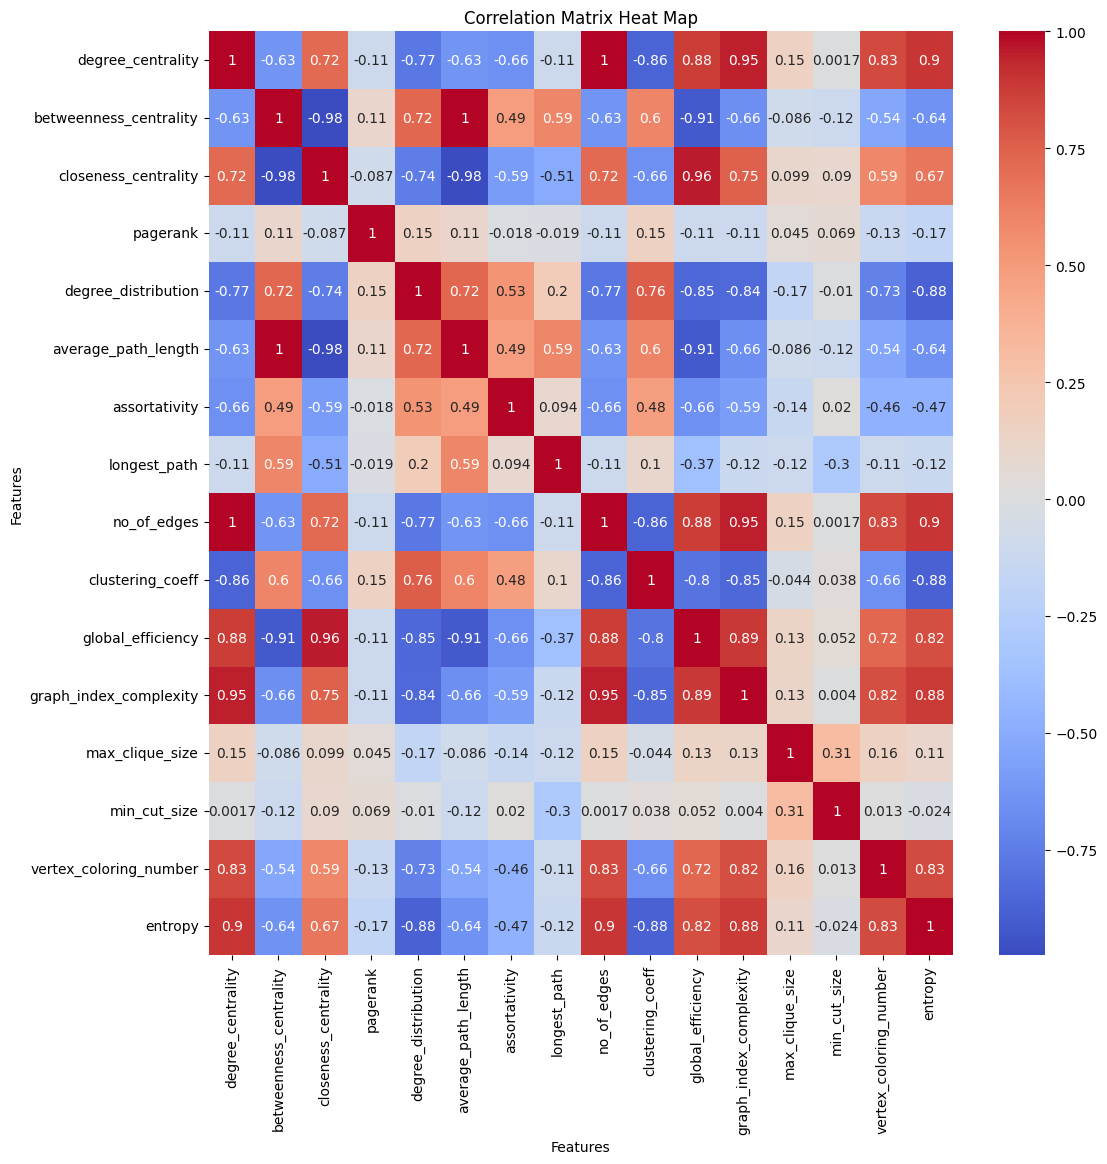

In [6]:
cov_matrix = np.corrcoef(np.array(df_normalized[df.columns[:-1]]), rowvar=False)

fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', ax=ax,
            xticklabels=features, yticklabels=features)

ax.set_title('Correlation Matrix Heat Map')
ax.set_xlabel('Features')
ax.set_ylabel('Features')

plt.show()

<AxesSubplot: >

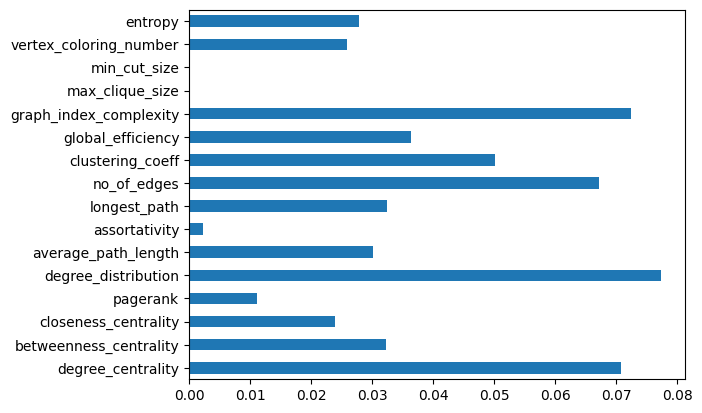

In [7]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd

importances = mutual_info_classif(df_normalized[df.columns[:-1]], df_normalized[df.columns[-1]])
feat_importances = pd.Series(importances, index=features)
feat_importances.plot(kind='barh')

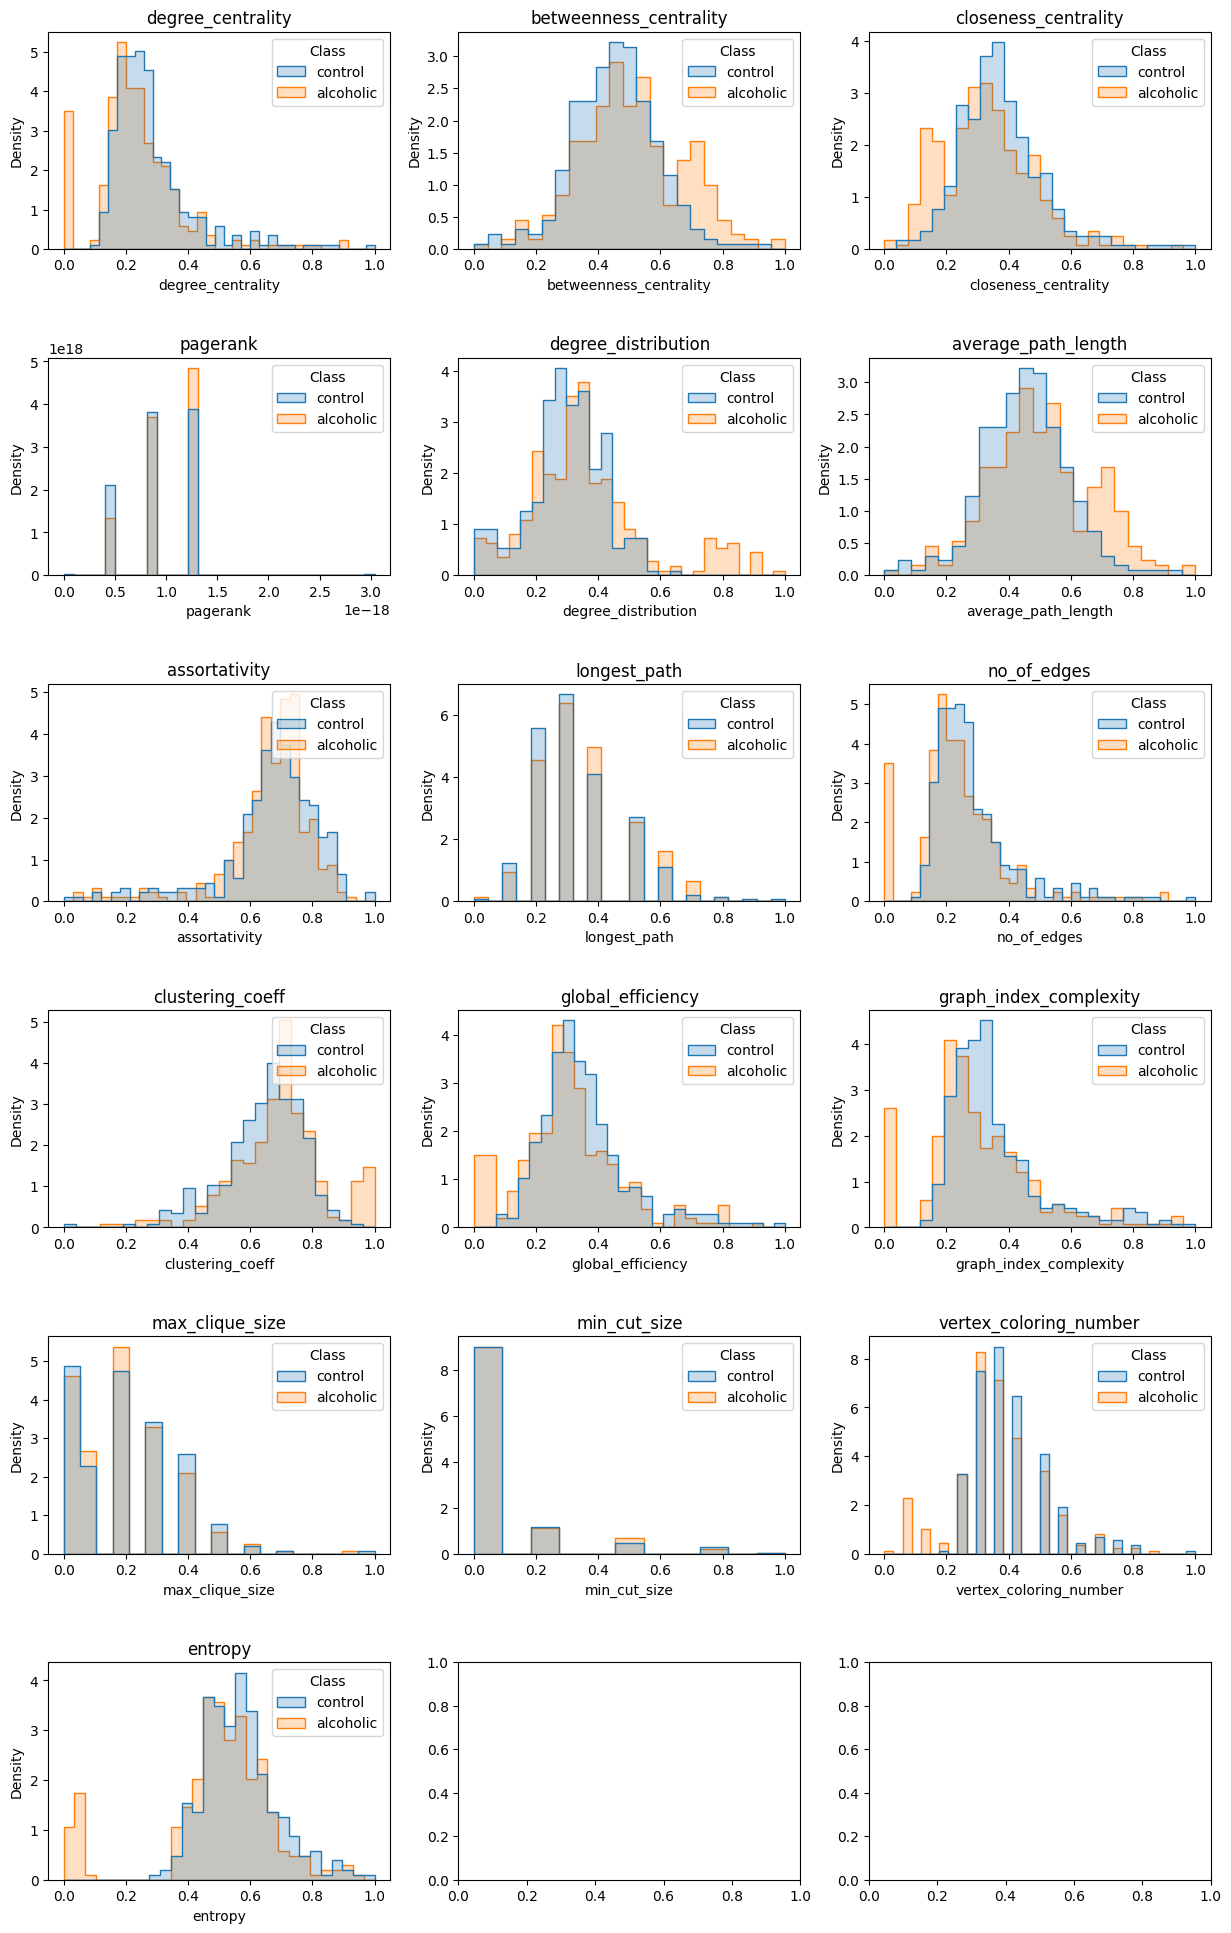

In [8]:
nrows = (len(df.columns) - 1) // 3 + 1  # Number of rows in the grid
ncols = 3  # Number of columns in the grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))

# Flatten the axes array
axes = axes.flatten()

# Loop through the columns and plot histograms
for i, col in enumerate(df_normalized.columns[:-1]):  # Exclude the last column ('Class')
    ax = axes[i]
    sns.histplot(data=df, x=col, hue="Class", element="step",
                 stat="density", common_norm=False, ax=ax)
    ax.set_title(col)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_11344\461393036.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\prana\AppData\Local\Temp\ipykernel_11344\461393036.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\prana\AppData\Local\Temp\ipykernel_11344\461393036.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\prana\AppData\Local\Temp\ipykernel_11344\461393036.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\prana\AppData\Local\Temp\ipykernel_11344\461393036.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\p

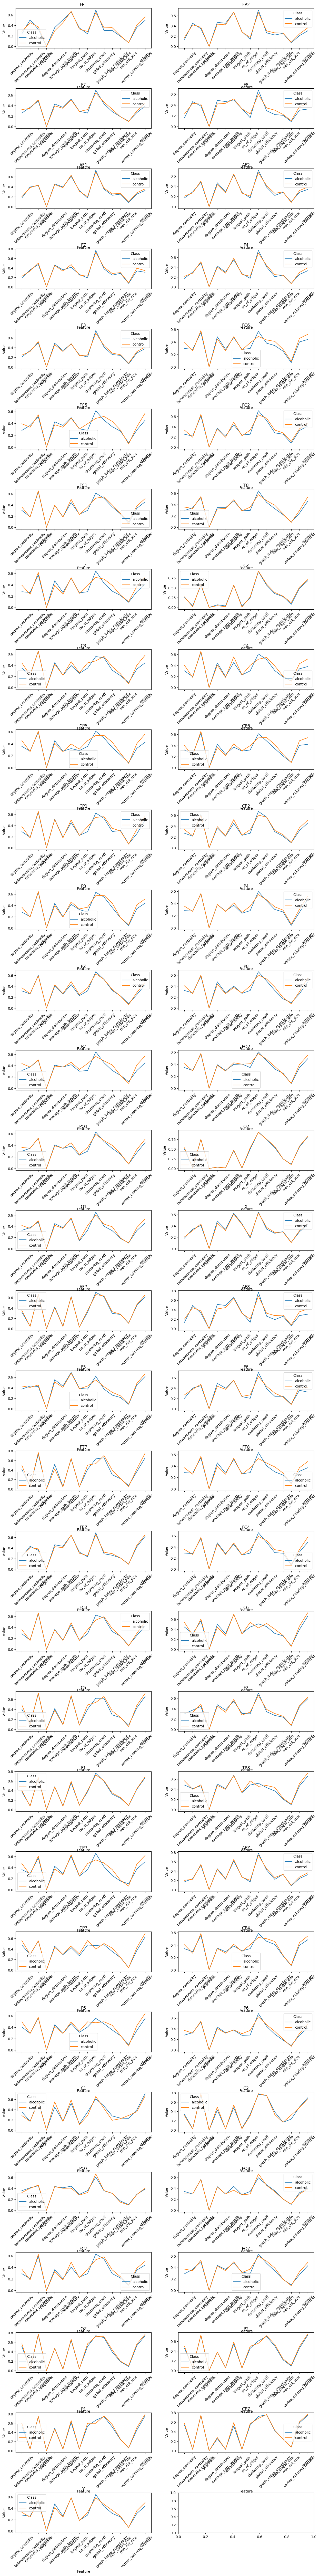

In [9]:
nrows = 32  # Number of rows in the grid (adjust based on sensor_list length)
ncols = 2  # Number of columns in the grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))

# Flatten the axes array
axes = axes.flatten()

for i, sensor in enumerate(sensor_list):
    ax = axes[i]
    df = normalize(get_sensor_data(sensor))

    # Group by 'Class' and calculate the mean of each feature
    data = df.groupby('Class').mean().reset_index()

    # Plotting the data
    melted_data = data.melt(
        id_vars='Class', var_name='Feature', value_name='Value')
    sns.lineplot(data=melted_data, x='Feature', y='Value', hue='Class', ax=ax)

    ax.set_title(sensor)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=1)

# Show the plot
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_11344\3346409263.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\prana\AppData\Local\Temp\ipykernel_11344\3346409263.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\prana\AppData\Local\Temp\ipykernel_11344\3346409263.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\prana\AppData\Local\Temp\ipykernel_11344\3346409263.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\prana\AppData\Local\Temp\ipykernel_11344\3346409263.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Us

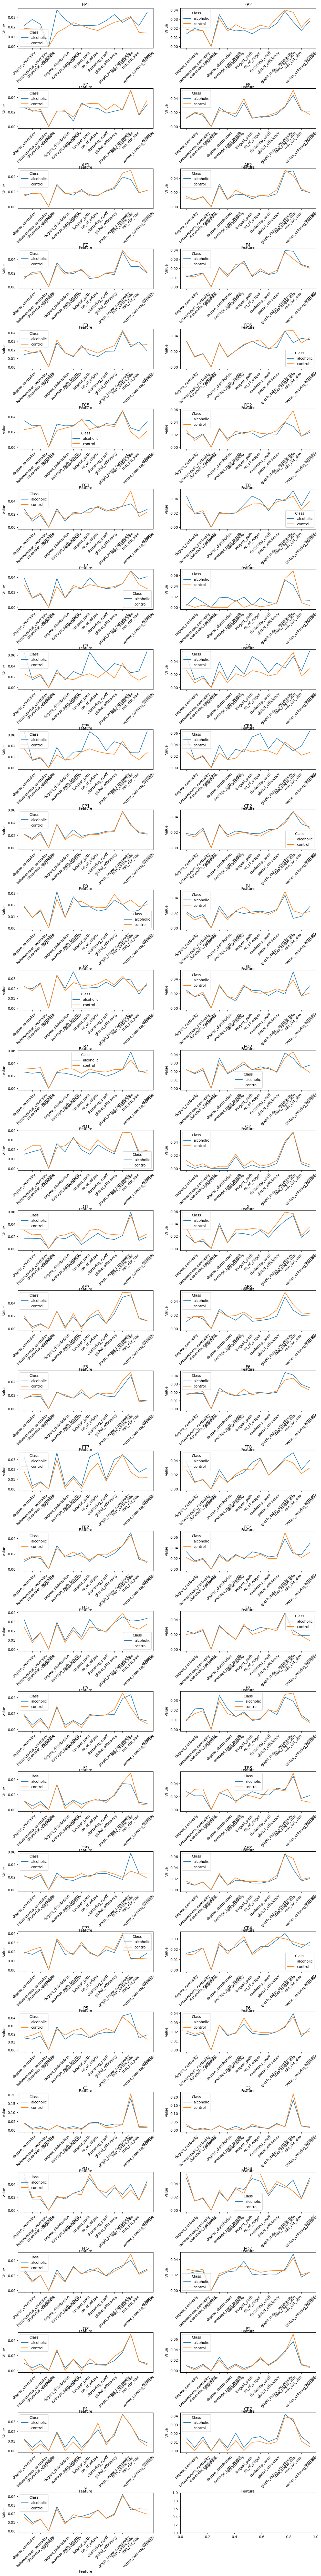

In [10]:
nrows = 32  # Number of rows in the grid (adjust based on sensor_list length)
ncols = 2  # Number of columns in the grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))

# Flatten the axes array
axes = axes.flatten()

for i, sensor in enumerate(sensor_list):
    ax = axes[i]
    df = normalize(get_sensor_data(sensor))

    # Group by 'Class' and calculate the mean of each feature
    data = df.groupby('Class').var().reset_index()

    # Plotting the data
    melted_data = data.melt(
        id_vars='Class', var_name='Feature', value_name='Value')
    sns.lineplot(data=melted_data, x='Feature', y='Value', hue='Class', ax=ax)

    ax.set_title(sensor)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=1)

# Show the plot
plt.show()

In [ ]:
nrows = 32  # Number of rows in the grid (adjust based on sensor_list length)
ncols = 2  # Number of columns in the grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))

# Flatten the axes array
axes = axes.flatten()

for i, sensor in enumerate(sensor_list):
    ax = axes[i]
    df = normalize(get_sensor_data(sensor))

    # Group by 'Class' and calculate the mean of each feature
    data = df.groupby('Class').var().reset_index()

    # Plotting the data
    melted_data = data.melt(
        id_vars='Class', var_name='Feature', value_name='Value')
    sns.lineplot(data=melted_data, x='Feature', y='Value', hue='Class', ax=ax)

    ax.set_title(sensor)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=1)

# Show the plot
plt.show()

### Best Channels
1. FCZ
2. PO8
3. TP7
4. FC5
5. CP3

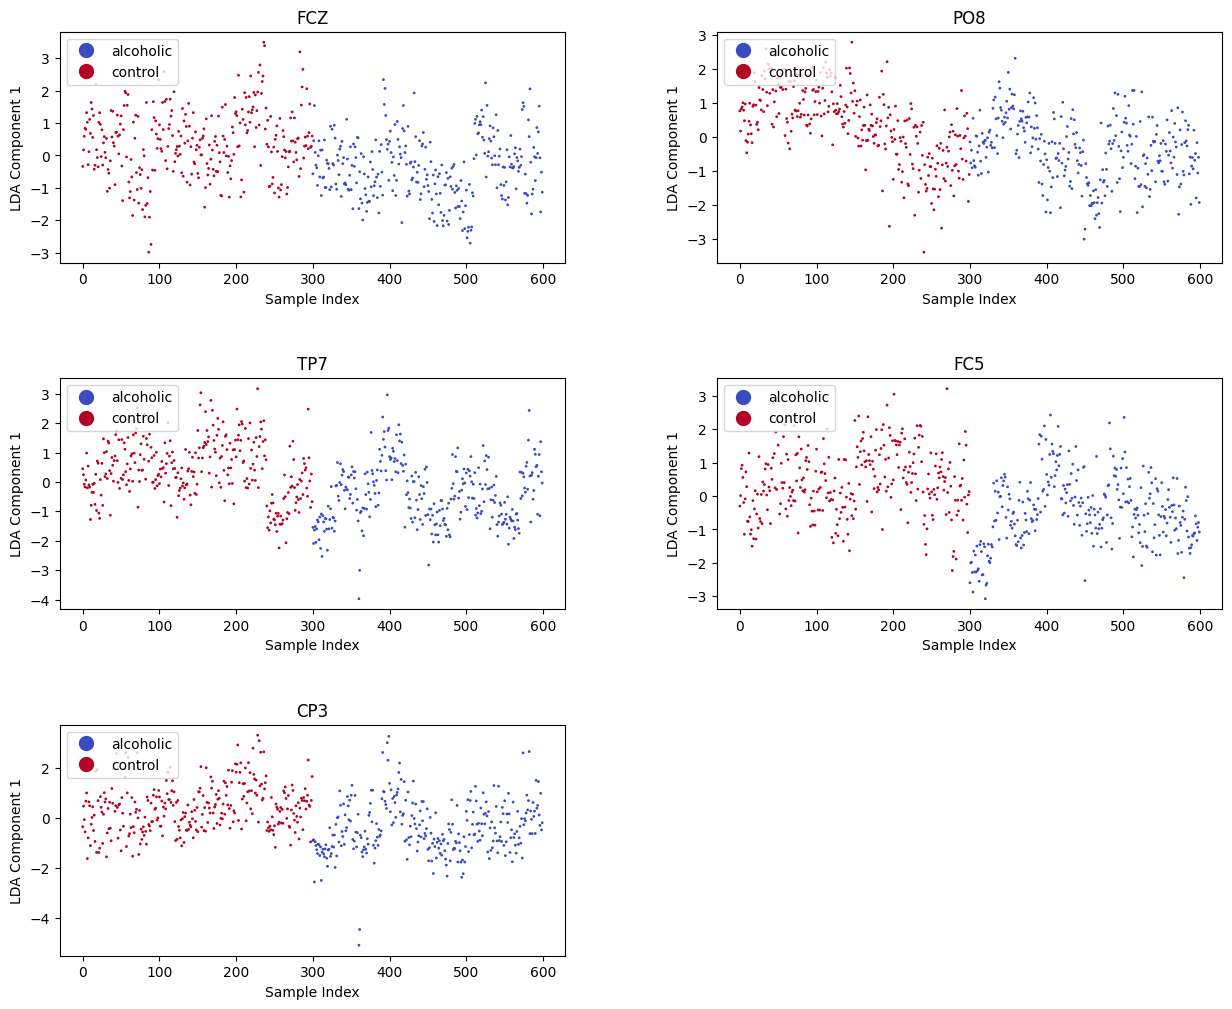

In [ ]:
selected_sensors = ["FCZ", "PO8", "TP7", "FC5", "CP3"]

lda = LinearDiscriminantAnalysis(n_components=1)
total_lda_data = np.zeros((len(selected_sensors), 600))

nrows = 3  # Number of rows in the grid
ncols = 2  # Number of columns in the grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))

axes = axes.flatten()

for i, sensor in enumerate(selected_sensors):
    data = normalize(get_sensor_data(sensor))
    lda_data = lda.fit_transform(
        data[data.columns[:-1]], data[data.columns[-1]])
    
    total_lda_data[i,:] = np.array(lda_data, dtype=float).reshape(-1)
    unique_classes = np.unique(data["Class"])
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(unique_classes)))

    # Map class labels to colors
    color_map = dict(zip(unique_classes, colors))
    point_colors = [color_map[label] for label in data["Class"]]

    ax = axes[i]
    ax.scatter(range(len(lda_data)), lda_data[:, 0], c=point_colors, s=1)

    # Add titles and labels
    ax.set_title(sensor)
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('LDA Component 1')
    
    legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=label, markersize=10, linestyle='') for label, color in color_map.items()]
    ax.legend(handles=legend_elements, loc='upper left')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

lda_df = pd.DataFrame(total_lda_data.T, columns=selected_sensors)
lda_df['Class'] = data['Class']

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Show the plot
plt.show()

In [ ]:
def lda_process_data(selected_sensors):
    lda = LinearDiscriminantAnalysis(n_components=1)
    total_lda_data = np.zeros((len(selected_sensors), 600))

    for i, sensor in enumerate(selected_sensors):
        data = normalize(get_sensor_data(sensor))
        lda_data = lda.fit_transform(data[data.columns[:-1]], data[data.columns[-1]])
        total_lda_data[i, :] = np.array(lda_data, dtype=float).reshape(-1)

    lda_df = pd.DataFrame(total_lda_data.T, columns=selected_sensors)
    lda_df['Class'] = data['Class']
    pd.DataFrame.to_csv(lda_df, 'lda_data_train.csv')

    return lda_df

selected_sensors = ["FCZ", "PO8", "TP7", "FC5", "CP3"]
processed_data = lda_process_data(selected_sensors)
print(processed_data)


          FCZ       PO8       TP7       FC5       CP3      Class
0   -0.339519  0.761064  0.448952 -0.299613 -0.359410    control
1    0.168773  0.169298  0.245315  0.013848  0.463892    control
2    0.589155  0.818918 -0.077216  0.822823 -0.075972    control
3    0.835435  0.876217 -0.169135  0.925316 -0.563021    control
4    0.803042  0.998513  0.067937  0.561219  0.662942    control
..        ...       ...       ...       ...       ...        ...
595  1.516908 -1.791880  0.933004 -0.830768  0.110309  alcoholic
596 -0.075323 -0.171529 -1.147749 -1.328829 -0.303811  alcoholic
597 -1.741462 -1.059696  1.366860 -0.932320  0.972767  alcoholic
598 -0.517063 -0.598727  0.345535 -0.788825 -0.485807  alcoholic
599 -1.134498 -1.926815 -0.035415 -1.074343 -0.198042  alcoholic

[600 rows x 6 columns]
